In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import rasterio as rio
import seaborn as sns
import statsmodels.graphics.api as smg
import warnings
warnings.filterwarnings("ignore")

Forma:  (6998, 11757)
Valores únicos:  [1]


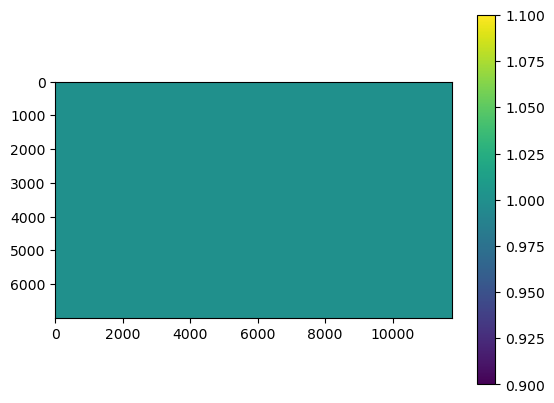

In [2]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Movimientos_masa\Movimientos_martes.tif')
inventario=raster.read(1)
inventario=np.where(inventario == 65535,0,1)
plt.imshow(inventario)
plt.colorbar();

print('Forma: ', inventario.shape)
print('Valores únicos: ', np.unique(inventario))

In [3]:
print('Valores originales únicos:', np.unique(inventario))


Valores originales únicos: [1]


Forma: (6998, 11757)
Valores únicos: [  0 255]
Valor NoData: None


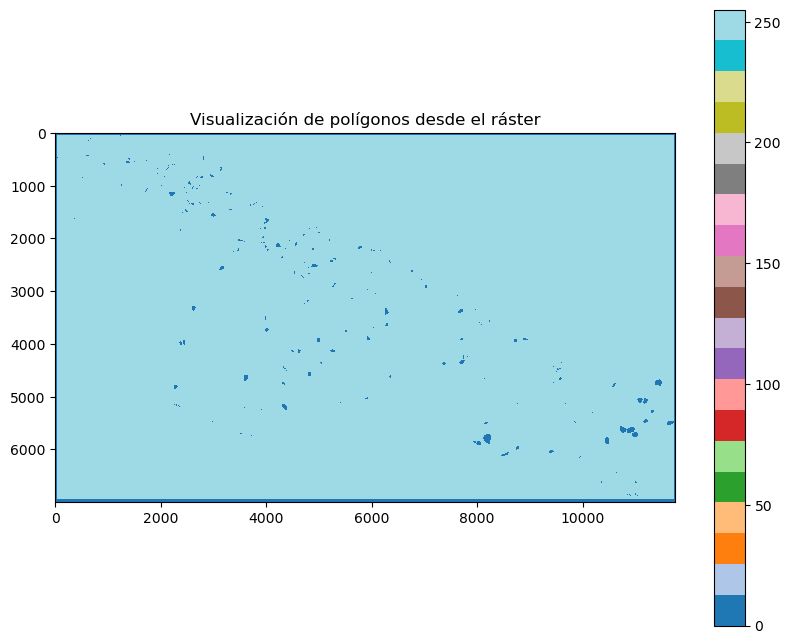

In [4]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Cargar el ráster
ruta = r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\Mov_marte.tif'

with rio.open(ruta) as src:
    inventario = src.read(1)
    nodata = src.nodata

print("Forma:", inventario.shape)
print("Valores únicos:", np.unique(inventario))
print("Valor NoData:", nodata)

# Aplicar máscara si hay NoData
if nodata is not None:
    inventario = np.where(inventario == nodata, np.nan, inventario)

# Visualización
plt.figure(figsize=(10, 8))
plt.imshow(inventario, cmap='tab20', interpolation='none')
plt.colorbar()
plt.title('Visualización de polígonos desde el ráster')
plt.show()


Valor NoData: None


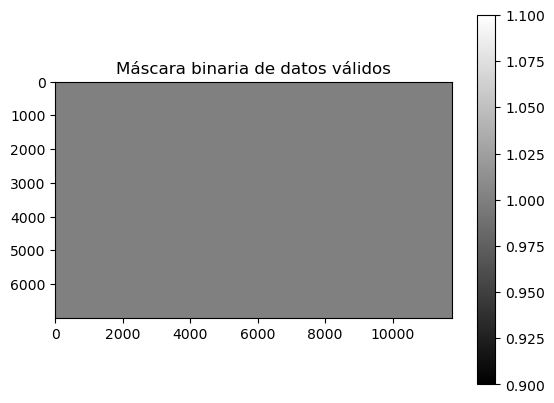

In [5]:
nodata = raster.nodata
print('Valor NoData:', nodata)

# Máscara binaria: 1 donde hay datos válidos, 0 donde hay NoData
mascara = np.where(inventario == nodata, 0, 1)

plt.imshow(mascara, cmap='gray')
plt.title('Máscara binaria de datos válidos')
plt.colorbar()


Forma:  (7969, 13231)
Valores únicos:  [1.]


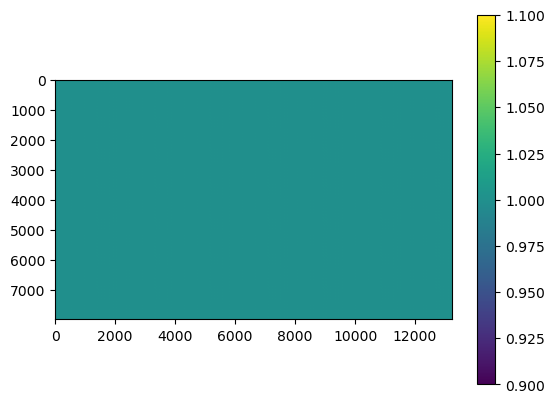

In [6]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,1)
plt.imshow(msk)
plt.colorbar();

print('Forma: ', msk.shape)
print('Valores únicos: ', np.unique(msk))

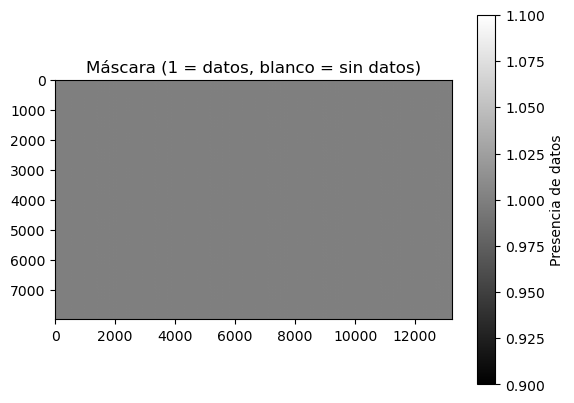

In [7]:
plt.imshow(msk, cmap='gray')
plt.title("Máscara (1 = datos, blanco = sin datos)")
plt.colorbar(label='Presencia de datos')
plt.show()


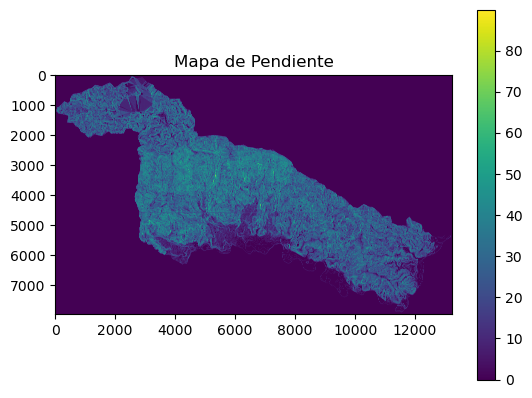

In [8]:
import rasterio as rio
import matplotlib.pyplot as plt

raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
pendiente = raster.read(1)

plt.imshow(pendiente, cmap='viridis')
plt.colorbar()
plt.title("Mapa de Pendiente")
plt.show()

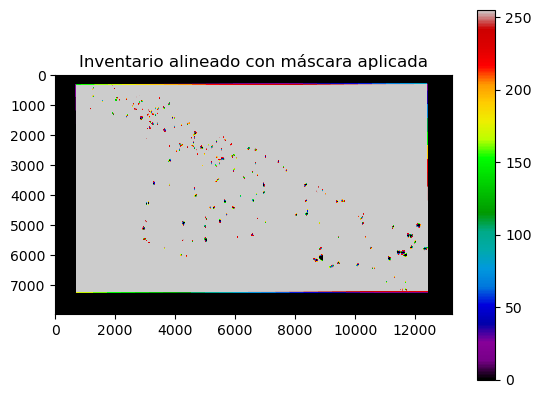

In [9]:
import numpy as np
import rasterio as rio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Abrir ráster de referencia (pendiente)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as src_ref:
    ref_shape = src_ref.read(1).shape
    ref_transform = src_ref.transform
    ref_crs = src_ref.crs
    msk = src_ref.read_masks(1)
    msk = np.where(msk == 0, np.nan, 1)

# Abrir ráster a alinear (inventario)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\Mov_marte.tif') as src_inv:
    inventario = src_inv.read(1)
    aligned_inv = np.empty(ref_shape, dtype=inventario.dtype)

    reproject(
        source=inventario,
        destination=aligned_inv,
        src_transform=src_inv.transform,
        src_crs=src_inv.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.nearest
    )

# Aplicar la máscara
inventario1 = aligned_inv * msk

# Visualizar
plt.imshow(inventario1, cmap='nipy_spectral')
plt.colorbar()
plt.title("Inventario alineado con máscara aplicada")
plt.show()


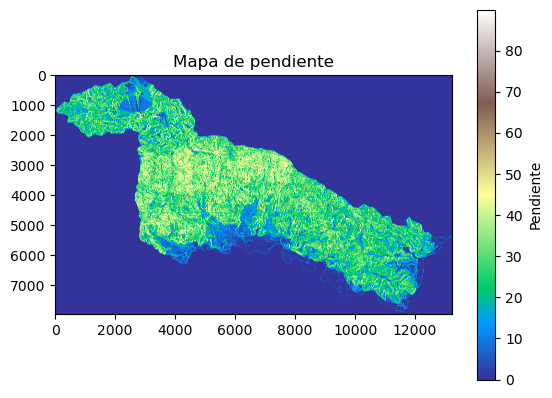

In [10]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el ráster
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as raster:
    slope = raster.read(1).astype(float)  # leer la banda 1 y convertir a float para poder tener NaNs

# Reemplazar valores negativos con NaN
slope = np.where(slope < 0, np.nan, slope)

# Visualizar
plt.imshow(slope, cmap='terrain')
plt.colorbar(label='Pendiente')
plt.title("Mapa de pendiente")
plt.show()


Forma:  (7969, 13231)
Valores únicos:  [0.0000000e+00 1.2363964e-03 2.4727928e-03 ... 8.9925980e+01 8.9925987e+01
 8.9926003e+01]


numpy.ndarray

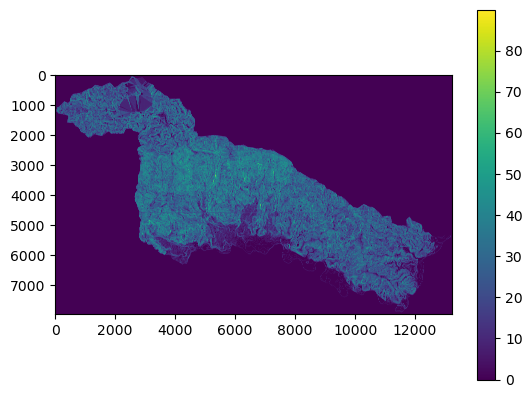

In [11]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
slope=raster.read(1)
slope=np.where(slope<0,np.nan,slope)
plt.imshow(slope)
plt.colorbar();

print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))
type(slope)

Forma:  (7969, 13231)
Valores únicos:  [0.00000000e+00 1.13173148e-04 1.21383986e-04 ... 3.59999664e+02
 3.59999878e+02            nan]


numpy.ndarray

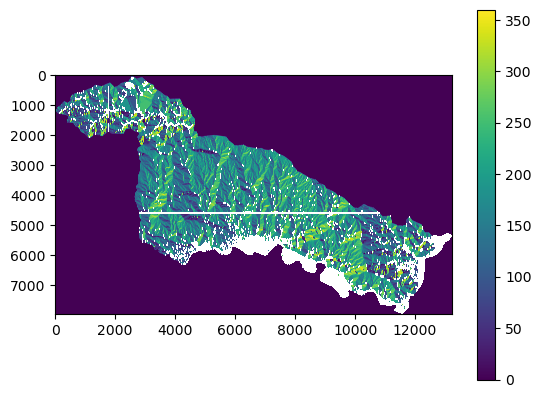

In [12]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Aspecto\Aspect.tif')
aspecto=raster.read(1)
#aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto=np.where(aspecto == aspecto.min(), np.nan, aspecto)
plt.imshow(aspecto)
plt.colorbar()

print('Forma: ', aspecto.shape)
print('Valores únicos: ', np.unique(aspecto))
type(aspecto)

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

numpy.ndarray

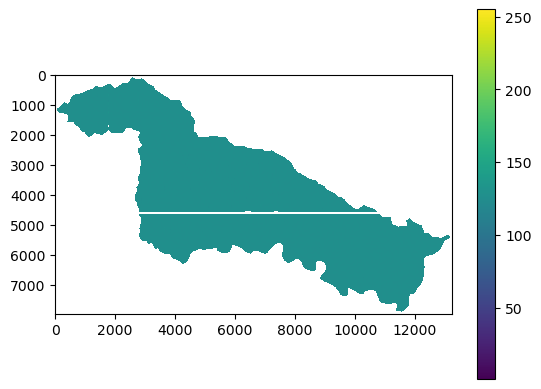

In [13]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\curva\Curvatura.tif')
curvatura=raster.read(1)
curvatura=np.where(curvatura == curvatura.min(), np.nan, curvatura)
plt.imshow(curvatura)
plt.colorbar()

print('Forma: ', curvatura.shape)
print('Valores únicos: ', np.unique(curvatura))
type(curvatura)

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

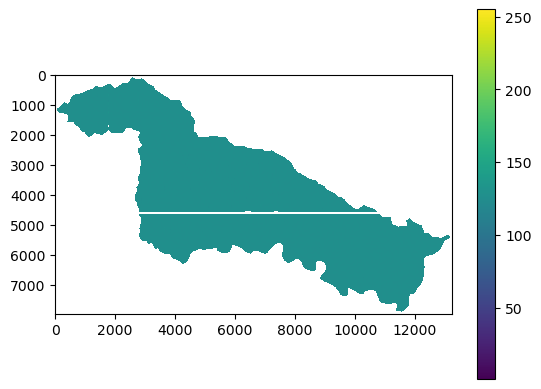

In [14]:
curvatura1 = msk*curvatura
plt.imshow(curvatura1)
plt.colorbar();

print('Forma: ', curvatura1.shape)
print('Valores únicos: ', np.unique(curvatura1))

(105437839,)

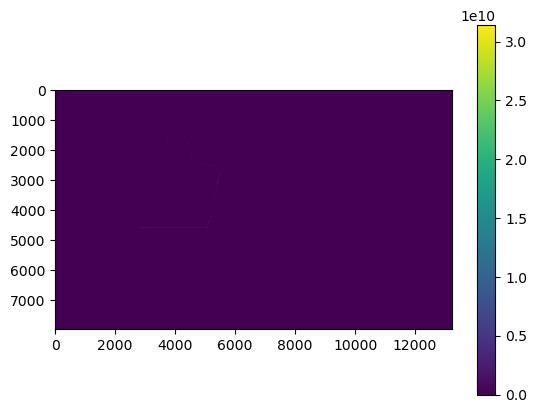

In [15]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\flujo\Flow_ac.tif')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape

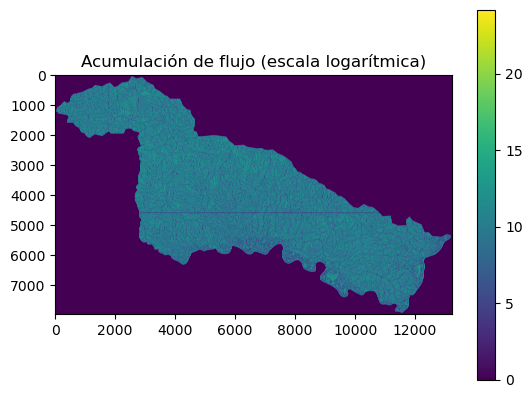

In [16]:
flujo_log = np.log1p(flujo)  # log(1 + x) evita problemas con 0
plt.imshow(flujo_log, cmap='viridis')
plt.colorbar()
plt.title("Acumulación de flujo (escala logarítmica)")
plt.show()


In [17]:
print(flujo.shape)
print(np.nanmin(flujo), np.nanmax(flujo))  # Esto te muestra el rango de valores


(7969, 13231)
0.0 31424190000.0


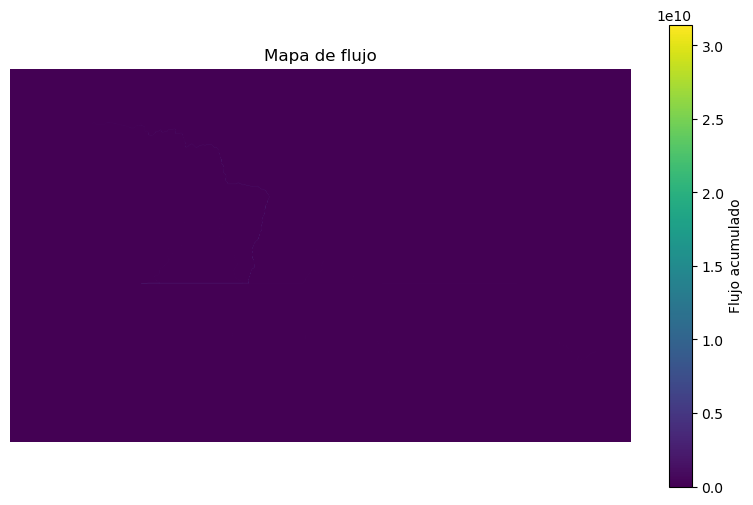

In [18]:
plt.figure(figsize=(10, 6))
plt.imshow(flujo, cmap='viridis')  # Puedes probar otros colormaps también
plt.colorbar(label='Flujo acumulado')
plt.title('Mapa de flujo')
plt.axis('off')
plt.show()


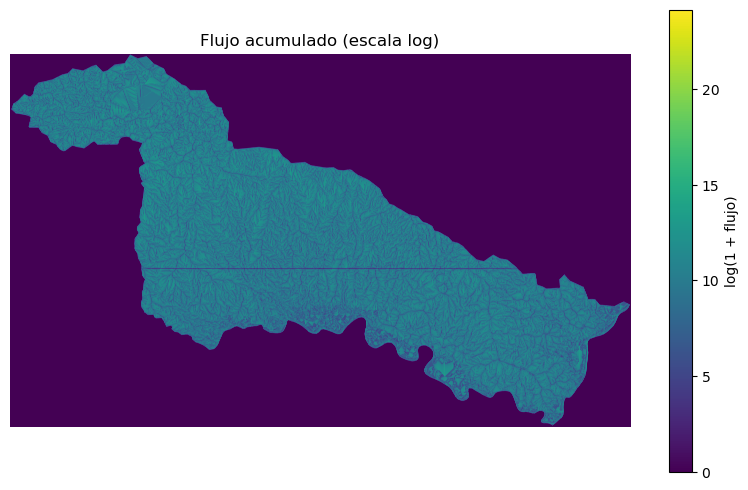

In [19]:
plt.figure(figsize=(10, 6))
plt.imshow(np.log1p(flujo), cmap='viridis')  # log1p evita log(0)
plt.colorbar(label='log(1 + flujo)')
plt.title('Flujo acumulado (escala log)')
plt.axis('off')
plt.show()


Forma:  (7969, 13231)
Valores únicos:  [0.00000000e+00 1.04400000e+03 1.04400427e+03 ... 3.14241802e+10
 3.14241864e+10 3.14241905e+10]


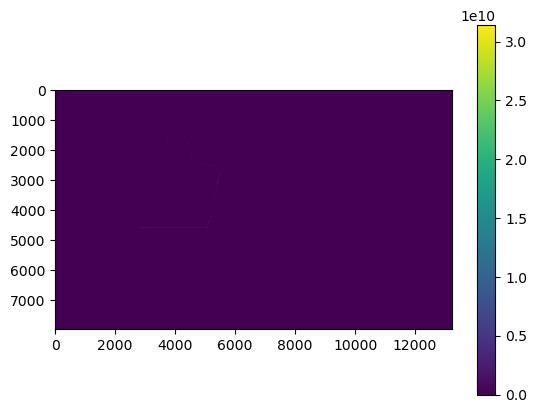

In [20]:
flujo1 = msk*flujo
plt.imshow(flujo1)
plt.colorbar();

print('Forma: ', flujo1.shape)
print('Valores únicos: ', np.unique(flujo1))

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

numpy.ndarray

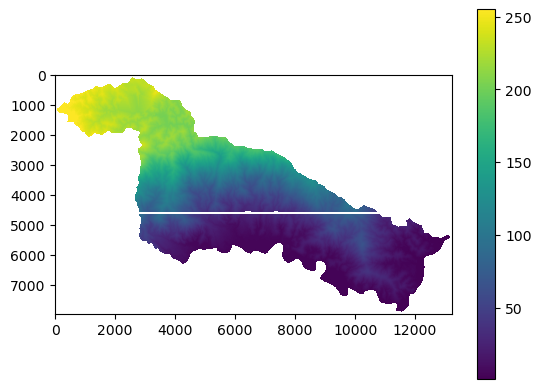

In [21]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\eleva\elevation.tif')
elevacion=raster.read(1)
elevacion=np.where(elevacion==0,np.nan,elevacion)
plt.imshow(elevacion)
plt.colorbar();

print('Forma: ', elevacion.shape)
print('Valores únicos: ', np.unique(elevacion))
type(elevacion)

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

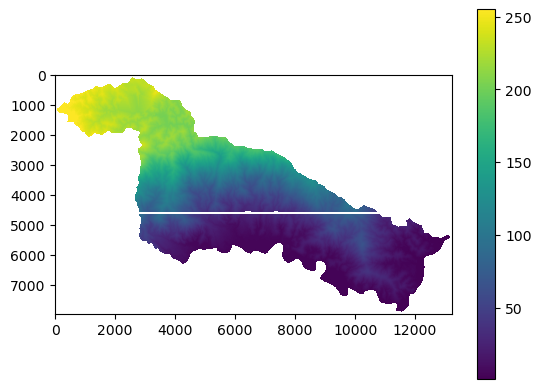

In [22]:
elevacion1 = msk*elevacion
plt.imshow(elevacion1)
plt.colorbar();

print('Forma: ', elevacion1.shape)
print('Valores únicos: ', np.unique(elevacion1))

Forma:  (7969, 13231)
Valores únicos:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


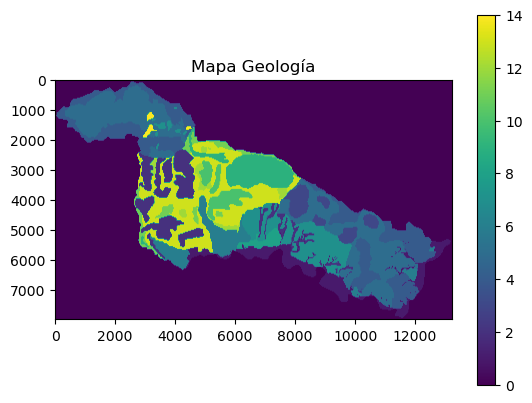

In [23]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\geolo_pro\geologia_reproyectada.tif')
geologia=raster.read(1)
geologia=np.where(geologia == 15,np.nan,geologia)
plt.imshow(geologia)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa Geología')
print('Forma: ', geologia.shape)
print('Valores únicos: ', np.unique(geologia))

Forma:  (7969, 13231)
Valores únicos:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


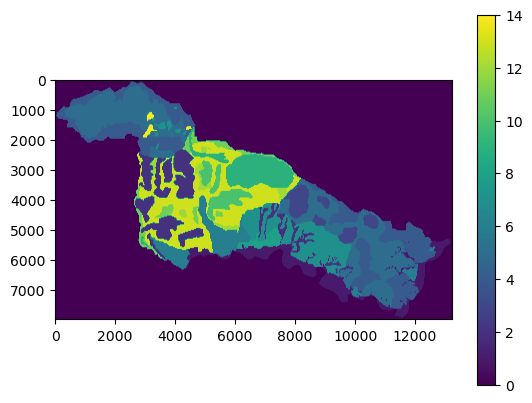

In [24]:
geologia1 = msk*geologia
plt.imshow(geologia1)
plt.colorbar();

print('Forma: ', geologia1.shape)
print('Valores únicos: ', np.unique(geologia1))

Forma:  (7969, 13231)
Valores únicos:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267.
 268. 269.]


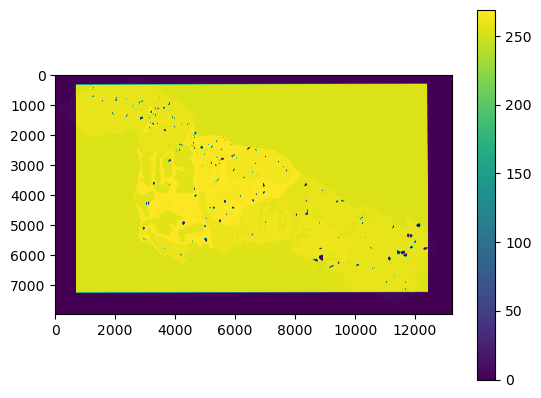

In [25]:
h = geologia + inventario1
plt.imshow(h)
plt.colorbar();

print('Forma: ', h.shape)
print('Valores únicos: ', np.unique(h))

In [26]:
#Convertimos matrices a vectores

inventariovector = inventario1.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

aspectovector = aspecto.ravel()
print('Longitud aspectovector: ', aspectovector.shape[0])

curvaturavector = curvatura1.ravel()
print('Longitud curvaturavector: ', curvaturavector.shape[0])

flujovector = flujo1.ravel()
print('Longitud flujovector: ', flujovector.shape[0])

elevacionvector = elevacion1.ravel()
print('Longitud elevacionvector: ', elevacionvector.shape[0])
"""
geologiavector = geologia1.ravel()
print('Longitud geologiavector: ', geologiavector.shape[0])
"""

Longitud inventariovector:  105437839
Longitud slopevector:  105437839
Longitud aspectovector:  105437839
Longitud curvaturavector:  105437839
Longitud flujovector:  105437839
Longitud elevacionvector:  105437839


"\ngeologiavector = geologia1.ravel()\nprint('Longitud geologiavector: ', geologiavector.shape[0])\n"

In [27]:
import numpy as np

# Paso 1: Asegúrate de que todos los vectores están definidos
geologiavector = geologia1.ravel()  # Quita el comentario si lo necesitas

# Paso 2: Apilamos todos los vectores en un array 2D
stack = np.stack([
    inventariovector,
    slopevector,
    aspectovector,
    curvaturavector,
    flujovector,
    elevacionvector,
    geologiavector  # Puedes quitar esta línea si no vas a usarla
], axis=1)

# Paso 3: Creamos una máscara que elimina cualquier fila que tenga al menos un NaN
mask = ~np.any(np.isnan(stack), axis=1)

# Paso 4: Aplicamos la máscara a todos los datos a la vez
stack_clean = stack[mask]

# Paso 5: Separar nuevamente los vectores
inventariovectorMenM   = stack_clean[:, 0]
slopevectorMenM        = stack_clean[:, 1]
aspectovectorMenM      = stack_clean[:, 2]
curvaturavectorMenM    = stack_clean[:, 3]
flujovectorMenM        = stack_clean[:, 4]
elevacionvectorMenM    = stack_clean[:, 5]
geologiavectorMenM     = stack_clean[:, 6]  # si lo incluiste

print('Longitud final (sin NaN en ninguna capa):', inventariovectorMenM.shape[0])



Longitud final (sin NaN en ninguna capa): 36486920


In [28]:
#Realizamos el Dataframe

diccionario={'inventario':inventariovectorMenM, 'pendiente':slopevectorMenM, 'aspectos':aspectovectorMenM, 
             'curvatura':curvaturavectorMenM, 'Flujo Acumulado': flujovectorMenM, 'elevacion':elevacionvectorMenM}

df=pd.DataFrame(diccionario)
print(list(df.columns))

#tablaDatos.tail(5)

['inventario', 'pendiente', 'aspectos', 'curvatura', 'Flujo Acumulado', 'elevacion']


In [29]:
df.head()

,inventario,pendiente,aspectos,curvatura,Flujo Acumulado,elevacion
0,0.0,0.0,0.0,127.0,0.000000,239.0
1,0.0,0.0,0.0,128.0,0.000000,239.0
2,0.0,0.0,0.0,127.0,0.000000,239.0
3,0.0,0.0,0.0,127.0,4602.217773,239.0
4,0.0,0.0,0.0,127.0,6903.275391,239.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36486920 entries, 0 to 36486919
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   inventario       float64
 1   pendiente        float64
 2   aspectos         float64
 3   curvatura        float64
 4   Flujo Acumulado  float64
 5   elevacion        float64
dtypes: float64(6)
memory usage: 1.6 GB


In [31]:
import pandas as pd

# 1. Crea dos DataFrames según el valor de inventario
df_pos = df[df["inventario"] == 1]
df_neg = df[df["inventario"] == 0]

# 2. Toma una muestra del 10% del grupo negativo
df_neg_sample = df_neg.sample(frac=0.1, random_state=42)

# 3. Junta los dos
df1 = pd.concat([df_pos, df_neg_sample], ignore_index=True)

# Verifica resultado
print(df1["inventario"].value_counts())
df1.info()


inventario
0.0    154872
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154872 entries, 0 to 154871
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   inventario       154872 non-null  float64
 1   pendiente        154872 non-null  float64
 2   aspectos         154872 non-null  float64
 3   curvatura        154872 non-null  float64
 4   Flujo Acumulado  154872 non-null  float64
 5   elevacion        154872 non-null  float64
dtypes: float64(6)
memory usage: 7.1 MB


In [32]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 155114 entries, 2 to 36486916
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   inventario       155114 non-null  float64
 1   pendiente        155114 non-null  float64
 2   aspectos         155114 non-null  float64
 3   curvatura        155114 non-null  float64
 4   Flujo Acumulado  155114 non-null  float64
 5   elevacion        155114 non-null  float64
dtypes: float64(6)
memory usage: 8.3 MB


In [33]:
resumen=df1.describe().T
print(resumen)

                    count          mean           std    min          25%  \
inventario       155114.0  0.000000e+00  0.000000e+00    0.0     0.000000   
pendiente        155114.0  1.959671e+01  1.137327e+01    0.0     9.402564   
aspectos         155114.0  1.604277e+02  8.477580e+01    0.0    94.049171   
curvatura        155114.0  1.270371e+02  1.274271e+00  100.0   127.000000   
Flujo Acumulado  155114.0  1.248390e+06  8.787535e+07    0.0  7382.208984   
elevacion        155114.0  1.021182e+02  1.126113e+02    1.0     4.000000   

                          50%           75%           max  
inventario           0.000000      0.000000  0.000000e+00  
pendiente           19.826857     28.267174  8.991143e+01  
aspectos           159.363068    216.801186  3.599996e+02  
curvatura          127.000000    127.000000  2.550000e+02  
Flujo Acumulado  20856.406250  48347.200195  1.590894e+10  
elevacion           13.000000    233.000000  2.550000e+02  


In [34]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

,pendiente,aspectos,curvatura,Flujo Acumulado,elevacion
0,0.0,0.0,127.0,0.000000,239.0
1,0.0,0.0,128.0,0.000000,239.0
2,0.0,0.0,127.0,0.000000,239.0
3,0.0,0.0,127.0,4602.217773,239.0
4,0.0,0.0,127.0,6903.275391,239.0


In [35]:
#Contamos número de celdas con y sin MenM
df['inventario'].value_counts()

inventario
255.0    34938197
0.0       1548723
Name: count, dtype: int64

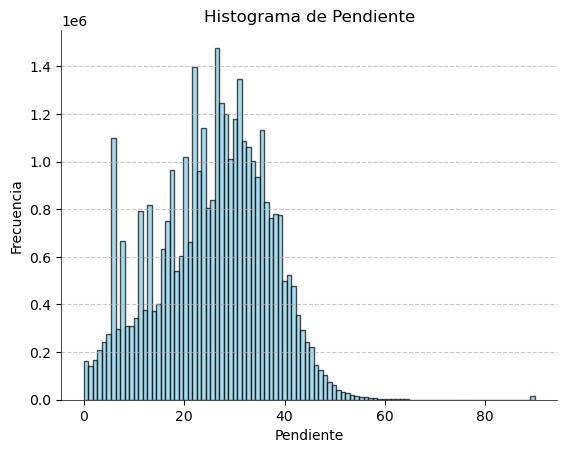

In [36]:
plt.hist(df['pendiente'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

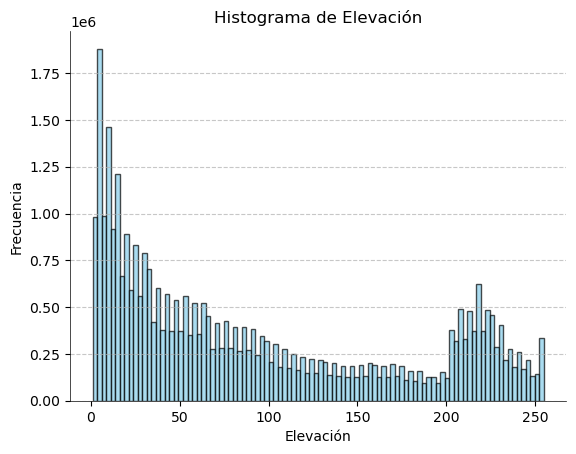

In [37]:
plt.hist(df['elevacion'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Elevación')
plt.xlabel('Elevación')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

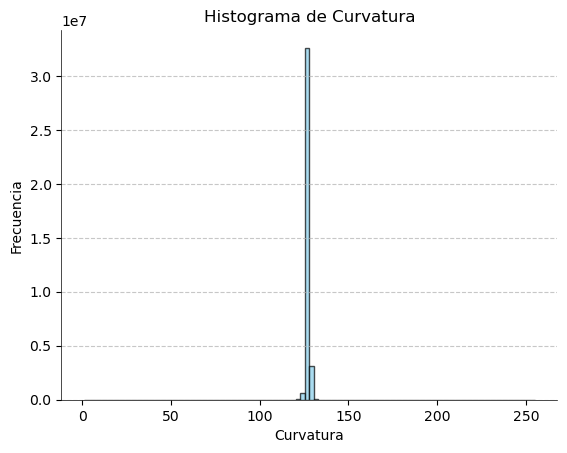

In [38]:
plt.hist(df['curvatura'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Curvatura')
plt.xlabel('Curvatura')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

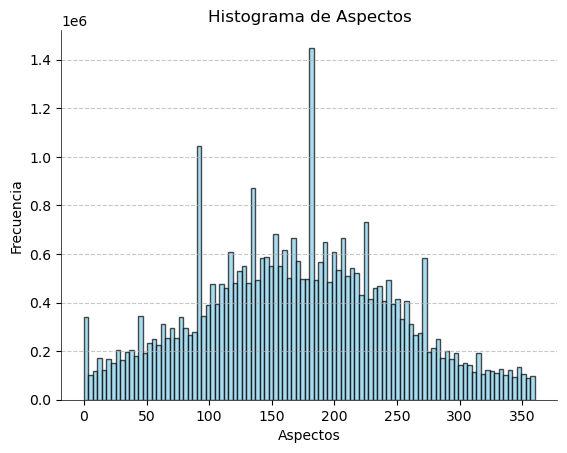

In [39]:
plt.hist(df['aspectos'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Aspectos')
plt.xlabel('Aspectos')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

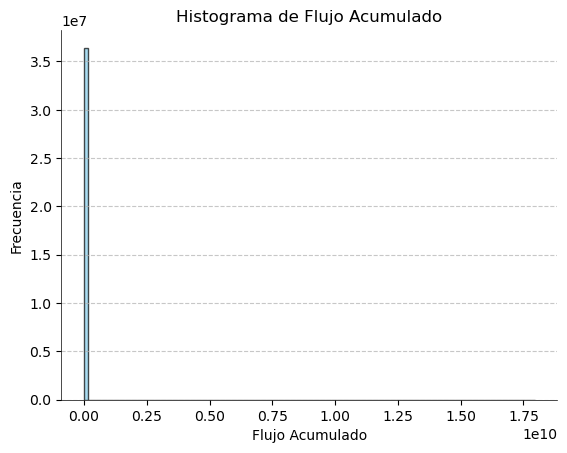

In [40]:
plt.hist(df['Flujo Acumulado'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Flujo Acumulado')
plt.xlabel('Flujo Acumulado')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

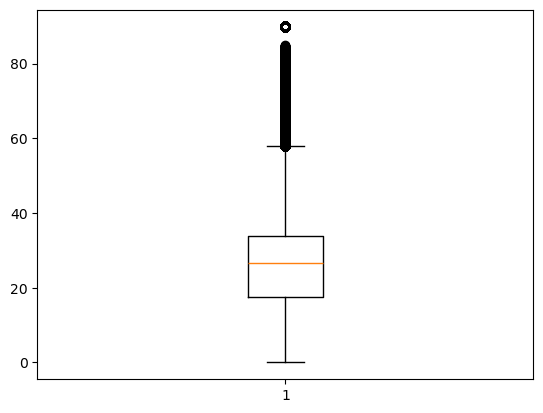

In [41]:
plt.boxplot(x='pendiente', data=df);
#sns.boxplot(x='pendiente', data=df);

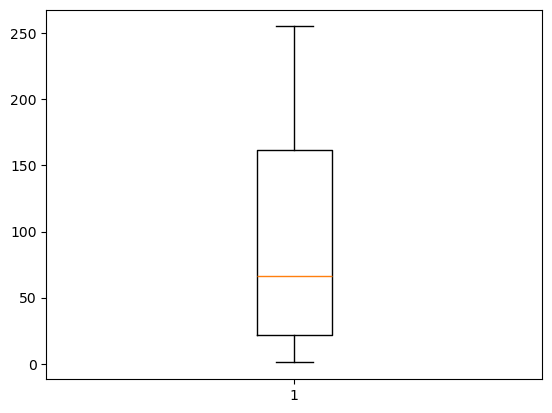

In [42]:
plt.boxplot(x='elevacion', data=df);

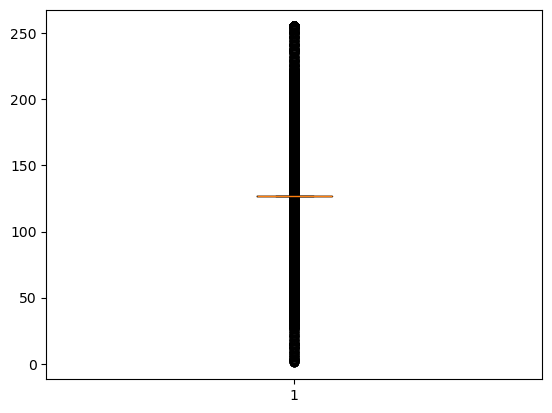

In [43]:
plt.boxplot(x='curvatura', data=df);

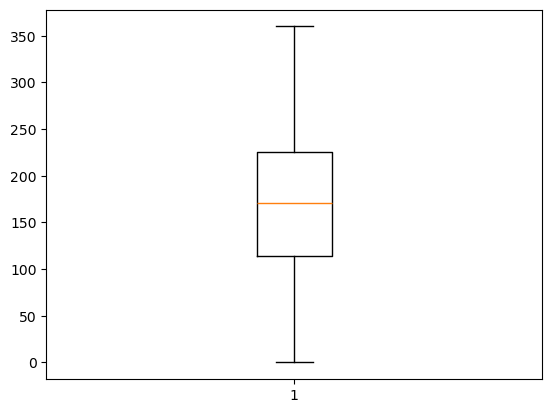

In [44]:
plt.boxplot(x='aspectos', data=df);

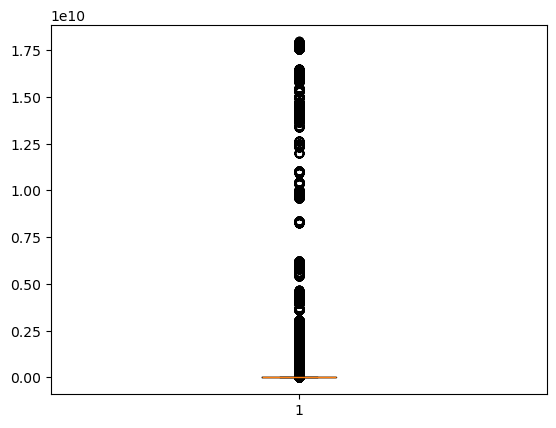

In [45]:
plt.boxplot(x='Flujo Acumulado', data=df);

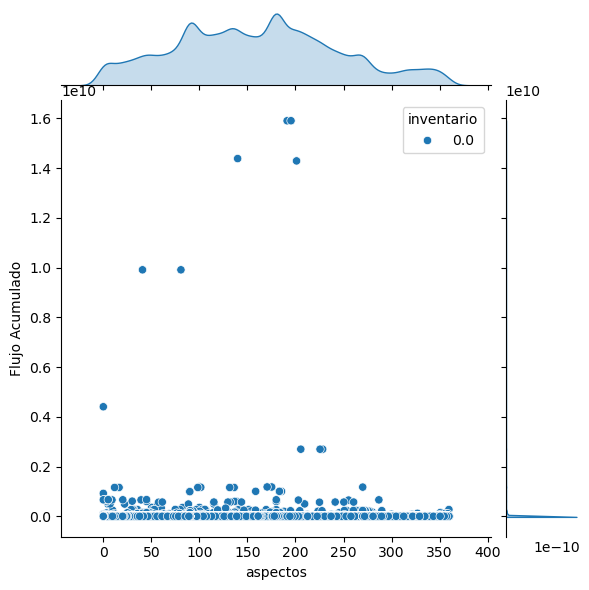

In [46]:
sns.jointplot(x='aspectos', y='Flujo Acumulado', hue="inventario", data=df1, kind='scatter');

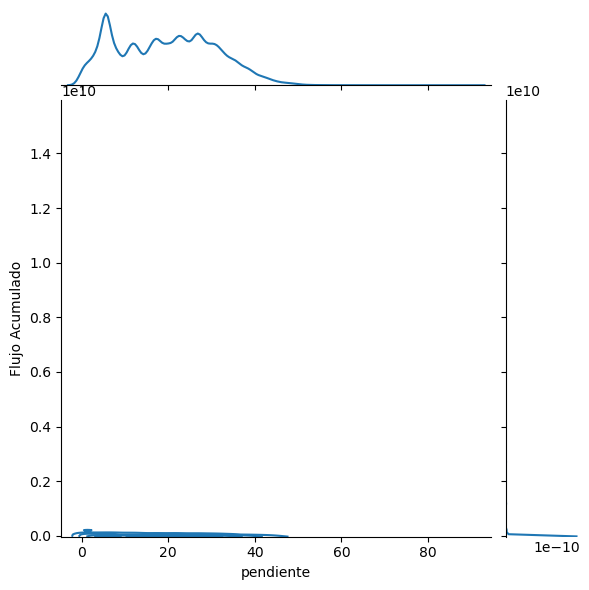

In [72]:
sns.jointplot(x='pendiente', y='Flujo Acumulado', data=df1, kind='kde');

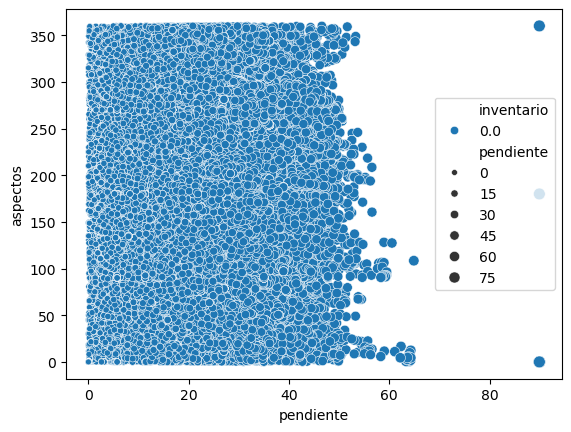

In [48]:
sns.scatterplot(x="pendiente", y="aspectos", hue="inventario", size='pendiente',data=df1);

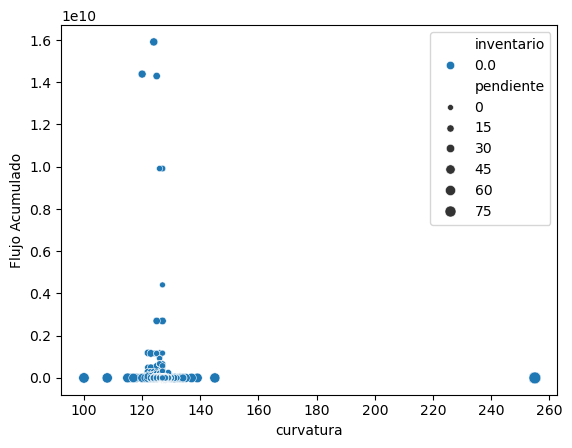

In [49]:
sns.scatterplot(x="curvatura", y="Flujo Acumulado", hue="inventario", size='pendiente',data=df1)
colores = sns.color_palette("Set2");

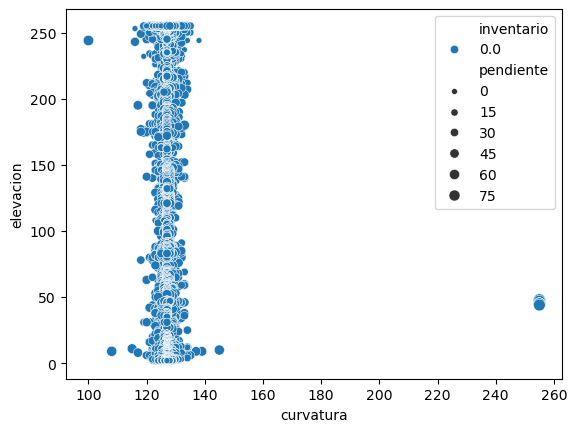

In [50]:
sns.scatterplot(x="curvatura", y="elevacion", hue="inventario", size='pendiente',data=df1);

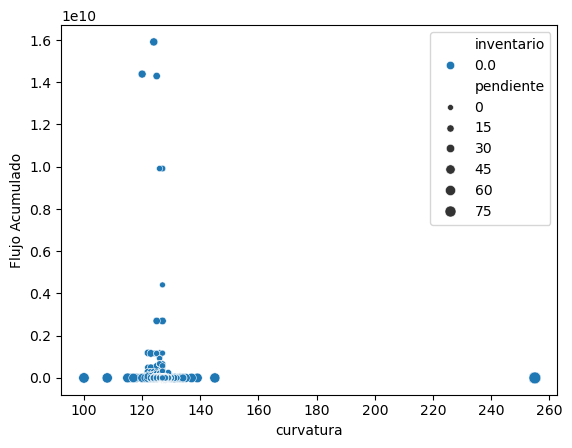

In [51]:
sns.scatterplot(x="curvatura", y="Flujo Acumulado", hue="inventario", size='pendiente',data=df1)
colores = sns.color_palette("Set2");

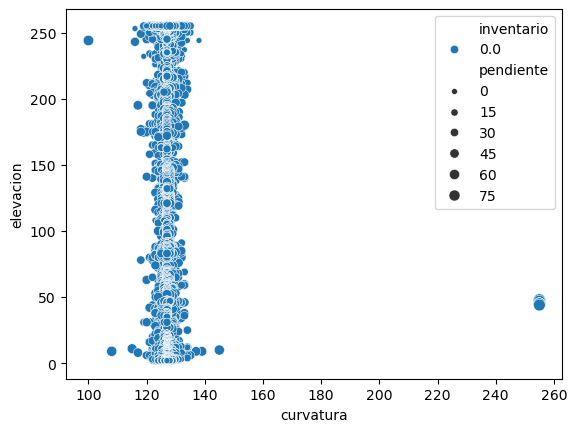

In [52]:
sns.scatterplot(x="curvatura", y="elevacion", hue="inventario", size='pendiente',data=df1);

In [53]:
media=df.groupby('inventario').mean()
print(media)

            pendiente    aspectos   curvatura  Flujo Acumulado   elevacion
inventario                                                                
0.0         19.624375  160.269557  127.035604     1.005468e+06  102.319911
255.0       25.886898  170.236485  127.094739     3.584399e+06   92.427134


In [54]:
#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

inventario
255.0    34938197
0.0       1548723
Name: count, dtype: int64

In [55]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

In [56]:
si_lands.count()

inventario         34938197
pendiente          34938197
aspectos           34938197
curvatura          34938197
Flujo Acumulado    34938197
elevacion          34938197
dtype: int64

In [57]:
no_lands.count()

inventario         1548723
pendiente          1548723
aspectos           1548723
curvatura          1548723
Flujo Acumulado    1548723
elevacion          1548723
dtype: int64

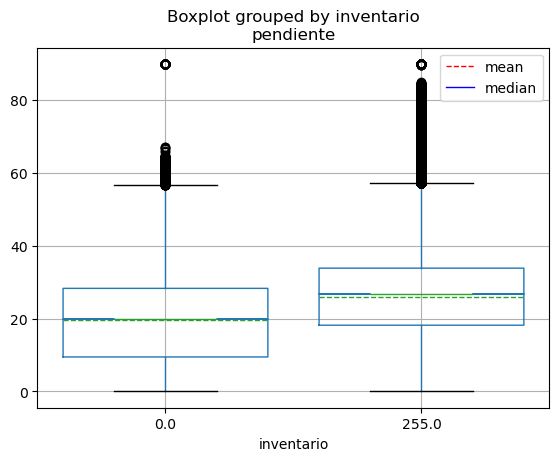

In [58]:
df.boxplot('pendiente', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [59]:
from scipy import stats
stats.ttest_ind(no_lands["pendiente"], si_lands["pendiente"])

TtestResult(statistic=-690.7480536897343, pvalue=0.0, df=36486918.0)

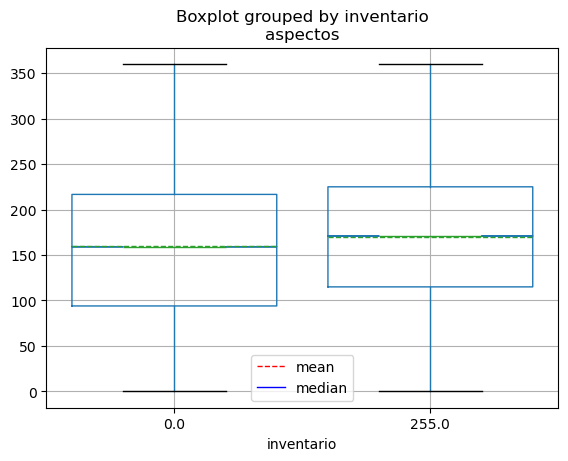

In [60]:
df.boxplot('aspectos', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [61]:
from scipy import stats
stats.ttest_ind(no_lands["curvatura"], si_lands["curvatura"])

TtestResult(statistic=-25.456814817949805, pvalue=5.950839536436515e-143, df=36486918.0)

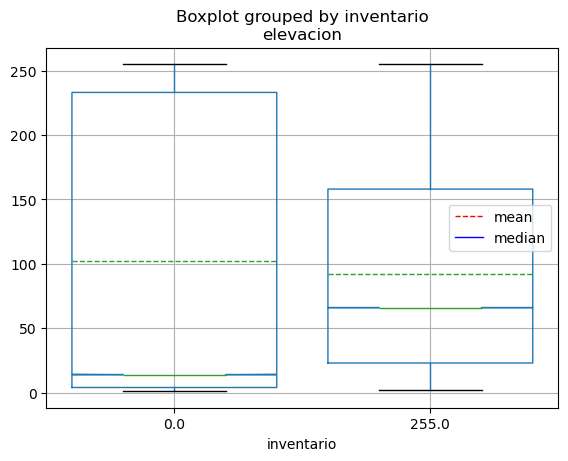

In [62]:
df.boxplot('elevacion', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [63]:
from scipy import stats
stats.ttest_ind(no_lands["elevacion"], si_lands["elevacion"])

TtestResult(statistic=150.35124521441836, pvalue=0.0, df=36486918.0)

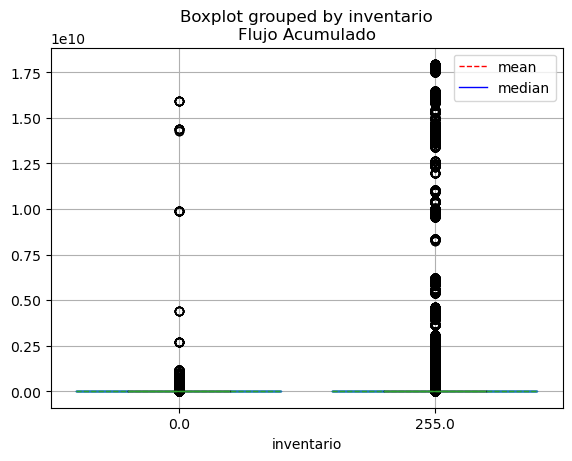

In [64]:
df.boxplot('Flujo Acumulado', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [65]:
from scipy import stats
stats.ttest_ind(no_lands["Flujo Acumulado"], si_lands["Flujo Acumulado"])

TtestResult(statistic=-17.905065881147564, pvalue=1.07743992221586e-71, df=36486918.0)

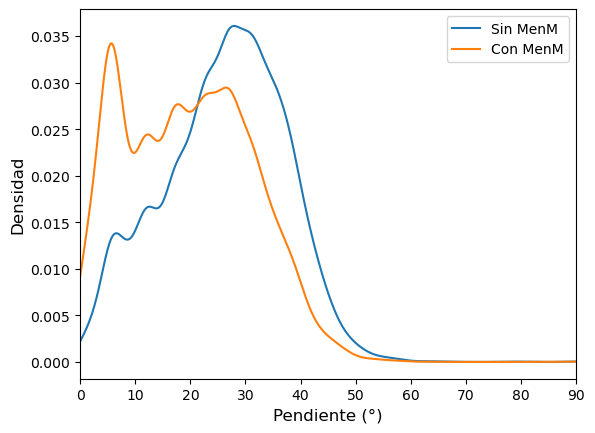

In [66]:
sample_si = si_lands['pendiente'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['pendiente'].dropna().sample(n=10000, random_state=42)

fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Sin MenM')
sample_no.plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0, 90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)
plt.show()


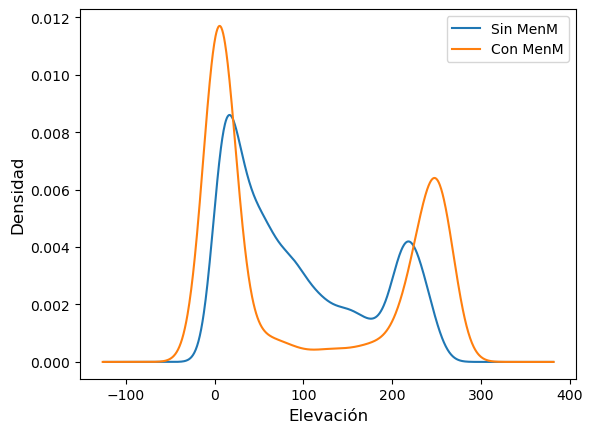

In [67]:
# Tomar una muestra representativa de 10,000 datos
sample_si = si_lands['elevacion'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['elevacion'].dropna().sample(n=10000, random_state=42)

# Graficar las curvas KDE
fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Sin MenM')
sample_no.plot.kde(ax=ax, label='Con MenM')

# Etiquetas y estilo
# ax.set_xlim(0, 1500)  # Puedes descomentar esto si conoces el rango útil
ax.set_xlabel('Elevación', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)
plt.show()


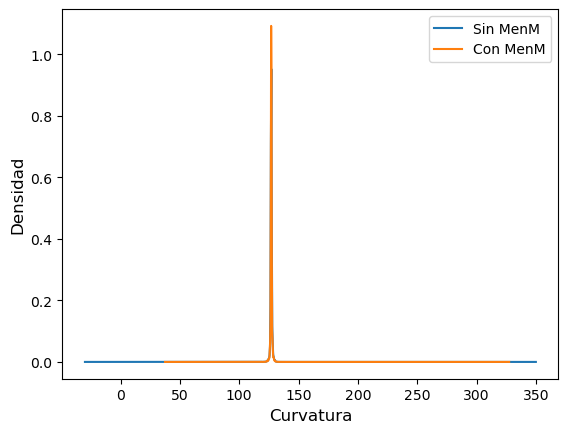

In [68]:
# Tomar una muestra representativa de 10,000 datos
sample_si = si_lands['curvatura'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['curvatura'].dropna().sample(n=10000, random_state=42)

# Graficar las curvas KDE
fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Sin MenM')
sample_no.plot.kde(ax=ax, label='Con MenM')

# Estética del gráfico
# ax.set_xlim(-10, 10)  # Descomenta si lo necesitas
ax.set_xlabel('Curvatura', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)
plt.show()



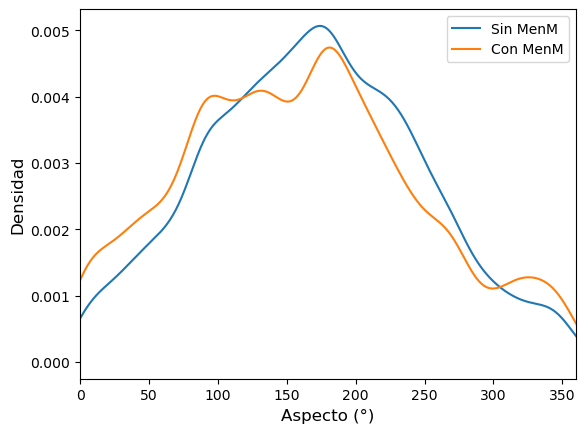

In [69]:
# Tomar una muestra representativa de 10.000 datos
sample_si = si_lands['aspectos'].dropna().sample(n=10000, random_state=42)
sample_no = no_lands['aspectos'].dropna().sample(n=10000, random_state=42)

# Graficar las curvas KDE
fig, ax = plt.subplots()
sample_si.plot.kde(ax=ax, label='Sin MenM')
sample_no.plot.kde(ax=ax, label='Con MenM')

# Estética del gráfico
ax.set_xlim(0, 360)
ax.set_xlabel('Aspecto (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize=10)
plt.show()


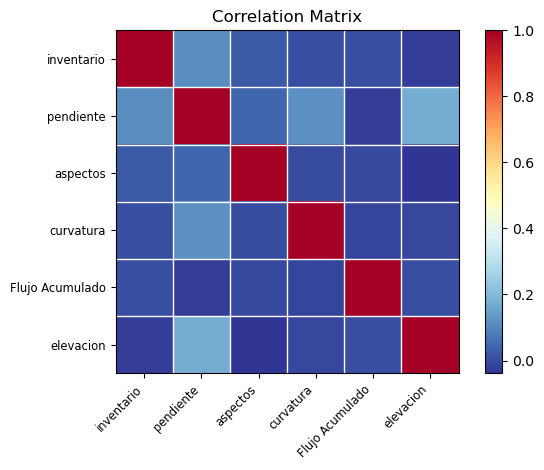

In [77]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

In [74]:
#se importan todas las librerias a utilizar
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

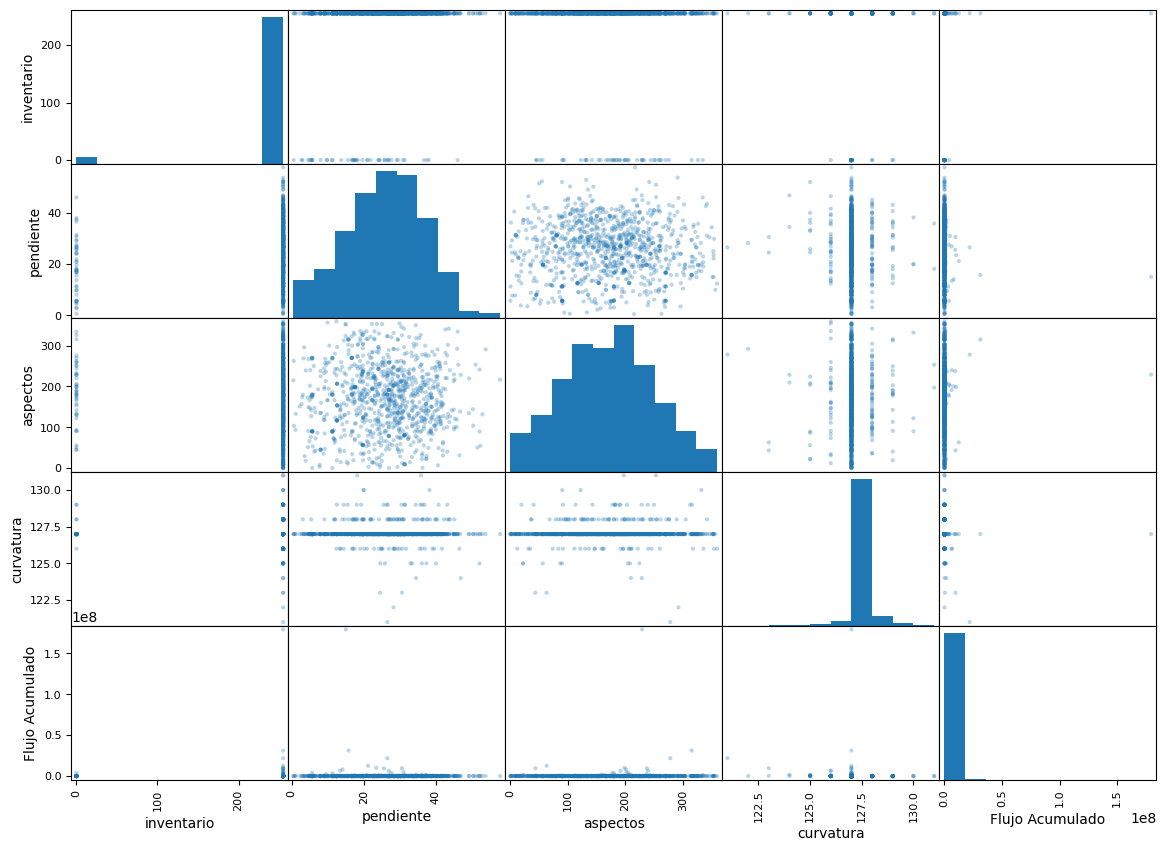

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame original

# Reducimos el tamaño del DataFrame a una muestra representativa (por ejemplo, 1000 filas)
df_sample = df.sample(n=1000, random_state=42)

# Seleccionamos solo un subconjunto de las columnas, si es necesario
# Por ejemplo, seleccionando las primeras 5 columnas
df_reducido = df_sample.iloc[:, :5]

# Generamos la matriz de dispersión con histogramas en la diagonal
pd.plotting.scatter_matrix(df_reducido, alpha=0.3, figsize=(14, 10), diagonal='hist')

# Mostramos el gráfico
plt.show()



In [78]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


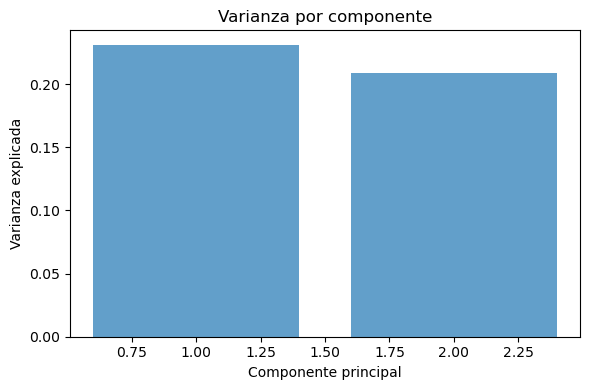

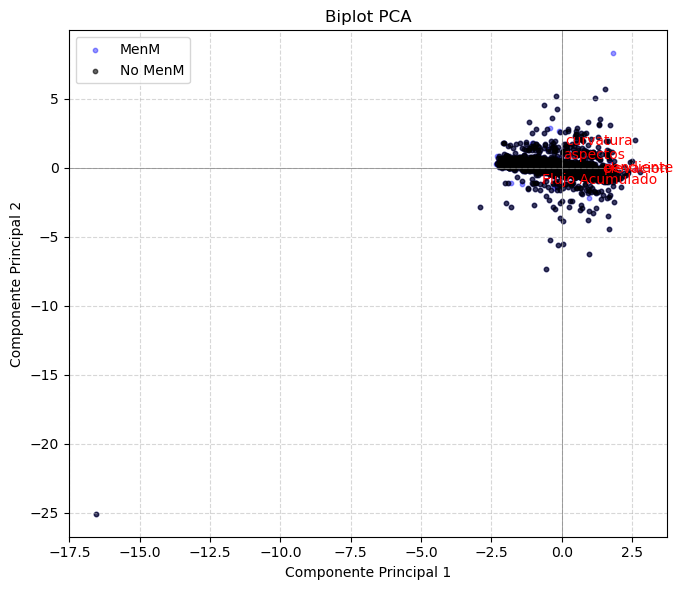

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Se toma una muestra para reducir carga si hay muchos datos (ajusta n si es necesario)
df_sample = df.sample(n=2000, random_state=42) if len(df) > 2000 else df.copy()

# Se guarda la columna de puntos y se eliminan del DataFrame
puntos = df_sample['inventario'].copy()
df_sample.drop('inventario', axis=1, inplace=True)

# Escalado de los datos
df_scaled = pd.DataFrame(scale(df_sample), columns=df_sample.columns)

# PCA
pca = PCA(n_components=2)  # Solo 2 componentes principales
pca_result = pca.fit_transform(df_scaled)

# Gráfica de varianza explicada
plt.figure(figsize=(6, 4))
plt.bar([1, 2], pca.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Componente principal')
plt.ylabel('Varianza explicada')
plt.title('Varianza por componente')
plt.tight_layout()
plt.show()

# Biplot simplificado
xvector = pca.components_[0]
yvector = pca.components_[1]
xs = pca_result[:, 0]
ys = pca_result[:, 1]

# Enmascaramos puntos con condición
mask1 = np.ma.masked_where(puntos < 1, xs)
mask2 = np.ma.masked_where(puntos < 1, ys)

plt.figure(figsize=(7, 6))

# Proyección de variables
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*2, yvector[i]*2, color='red', width=0.005, head_width=0.05)
    plt.text(xvector[i]*2.2, yvector[i]*2.2, df_scaled.columns[i], color='red', fontsize=10)

# Puntos proyectados
plt.scatter(xs, ys, s=10, c='blue', alpha=0.4, label='MenM')
plt.scatter(mask1, mask2, s=10, c='black', alpha=0.6, label='No MenM')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Biplot PCA')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


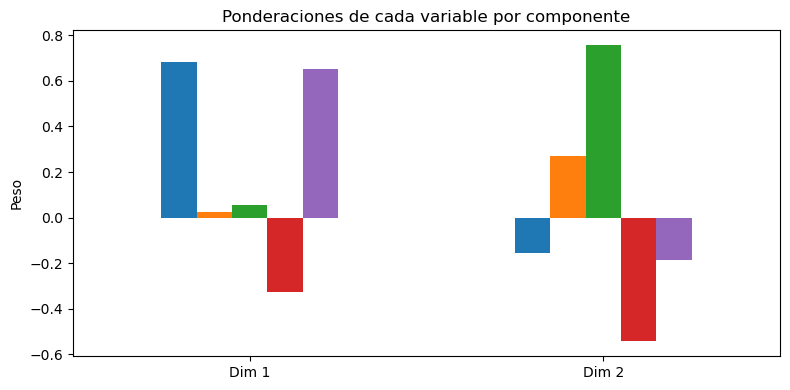

In [80]:
def pca_results_light(data, pca):
    dimensions = ['Dim {}'.format(i+1) for i in range(pca.n_components_)]

    components = pd.DataFrame(np.round(pca.components_, 3), columns=data.columns)
    components.index = dimensions

    variance_ratios = pd.DataFrame({
        'Explained Variance': np.round(pca.explained_variance_ratio_, 3)
    }, index=dimensions)

    # Solo graficamos si hay pocas dimensiones
    if pca.n_components_ <= 5:
        fig, ax = plt.subplots(figsize=(8, 4))
        components.plot(kind='bar', ax=ax, legend=False)
        ax.set_title('Ponderaciones de cada variable por componente')
        ax.set_ylabel('Peso')
        ax.set_xticklabels(dimensions, rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print("Demasiadas dimensiones para graficar de forma eficiente.")

    return pd.concat([variance_ratios, components], axis=1)

# Llamar función
resultados_pca = pca_results_light(df_scaled, pca)


In [84]:
print ("terminé")



   


terminé
